

# Project: prosperLoanData  Dataset 
## By: Shaimaa Eid



In [3]:
# imports and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# Load data from prosperLoanData.csv 
loans = pd.read_csv('prosperLoanData.csv',sep=',',error_bad_lines=False)

# Explor dataset columns
loans.columns

rem_columns=['ListingKey', 'ListingNumber','CreditGrade',  'BorrowerAPR', 
        'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore','ClosedDate', 'CurrentlyInGroup', 'GroupKey','LenderYield',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization','IncomeVerifiable',
       'AvailableBankcardCredit', 'TotalTrades','EmploymentStatusDuration',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       
             'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors']
loans.drop(rem_columns,axis =1,inplace = True)

loans.info()

loans.rename(columns={'ListingCreationDate':'Created','term':'Months','LoanStatus': 'Status','EstimatedEffectiveYield':'Yield','EstimatedLoss':'Loss','EstimatedReturn':'Return','ListingCategory (numeric)':'Category','EmploymentStatusDuration':'Emp_duration','IsBorrowerHomeowner':'Homeowner','StatedMonthlyIncome':'MonthlyIncome','LoanOriginalAmount':'Amount','MonthlyLoanPayment':'Installment'},inplace=True)

loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   EstimatedEffectiveYield    84853 non-null   float64
 5   EstimatedLoss              84853 non-null   float64
 6   EstimatedReturn            84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  IncomeRange                113937 non-null  object 
 13  StatedMonthlyIncome        11

,Created,Term,Status,BorrowerRate,Yield,Loss,Return,Category,BorrowerState,Occupation,EmploymentStatus,Homeowner,IncomeRange,MonthlyIncome,Amount,Installment
0,2007-08-26 19:09:29.263000000,36,Completed,0.1580,NaN,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",3083.333333,9425,330.43
1,2014-02-27 08:28:07.900000000,36,Current,0.0920,0.07960,0.0249,0.05470,2,CO,Professional,Employed,False,"$50,000-74,999",6125.000000,10000,318.93
2,2007-01-05 15:00:47.090000000,36,Completed,0.2750,NaN,NaN,NaN,0,GA,Other,Not available,False,Not displayed,2083.333333,3001,123.32
3,2012-10-22 11:02:35.010000000,36,Current,0.0974,0.08490,0.0249,0.06000,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",2875.000000,10000,321.45
4,2013-09-14 18:38:39.097000000,36,Current,0.2085,0.18316,0.0925,0.09066,2,MN,Executive,Employed,True,"$100,000+",9583.333333,15000,563.97


### The Dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
After <b>Data cleaning</b> and removing unwanted variables we hae 16 variables and 82682 rows.
in the following analysis I will examine the relation between loan status and other variables in an attampt to know which loans get paid and which has a potential risk of not getting paid.

### Feature(s) of interest
Created,Term, Status,BorrowerRate,Yield, Loss, Return, Category, BorrowerState, Occupation, EmploymentStatus.

In [4]:
# extracting year
loans.Created=loans.Created.str[0:4]

# fill nulls with proper data
loans.EmploymentStatus.fillna('Other')
loans.Occupation.fillna('Other')
#drop any remaining nulls
loans.dropna(inplace=True)

#delete duplicates
loans.drop_duplicates(inplace=True)

loans['Homeowner']=loans['Homeowner'].astype('int')

loans['Created']=loans['Created'].astype('category')

loans['Status']=loans['Status'].astype('category')

loans['EmploymentStatus']=loans['EmploymentStatus'].astype('category')

loans['IncomeRange']=loans['IncomeRange'].astype('category')

x=[]
for i in loans['Status']:
    if 'Past Due' in i:
        x.append(1)
    else:
        x.append(0)
loans['Past_Due']=x

<a id='eda'></a>
## Exploratory Data Analysis

In this section I'm trying to answer the following questions:
<ol>
<li>How many loans initiated per year?</li>
<li>How many Past due loans?</li>
<li>What duration is most frequent?</li>
<li>Who got the loans?</li>
<li>Who is not paying loans?</li>
</ol>



### How many loans initiated per year?

The year '2013' has the max number of loans created over all years, '2009' is the lowest in number of loans.


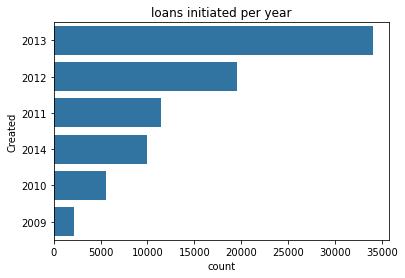

In [8]:
base_color = sb.color_palette()[0]

# Plot 'Created' count on a Horizontal bar chart
year_order = loans['Created'].value_counts().index
sb.countplot(data=loans, y='Created', color=base_color, order=year_order);
plt.title('loans initiated per year');
print("The year '2013' has the max number of loans created over all years, '2009' is the lowest in number of loans.")

### How many Past due loans?

In [34]:
# count loans by status
loans['Status'].value_counts()

Current                   54463
Completed                 19634
Chargedoff                 5335
Defaulted                  1005
Past Due (1-15 days)        793
Past Due (31-60 days)       356
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      201
Past Due (>120 days)         16
Name: Status, dtype: int64

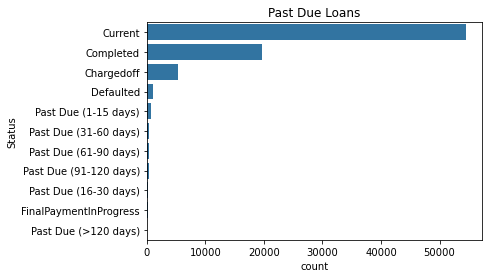

In [44]:
# Plot 'Status' count on a Horizontal bar chart
stat_order = loans['Status'].value_counts().index
sb.countplot(data=loans, y='Status', color=base_color, order=stat_order);
plt.title('Past Due Loans');

In [36]:
# Find past due loans
loan_past=loans['Past_Due'].value_counts()
loan_past

0    80638
1     2044
Name: Past_Due, dtype: int64

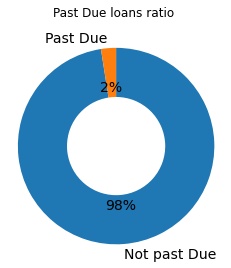

In [43]:
# plot pie chart
plt.pie(loan_past, labels = ['Not past Due','Past Due'], startangle = 90, counterclock = False, autopct='%1.0f%%',wedgeprops = {'width' : 0.5},textprops={'fontsize': 14});
plt.axis('square');
plt.title('Past Due loans ratio \n');

> Only 2044 loans are Past due with a 2% percent of total loans.

### What duration is most frequent?

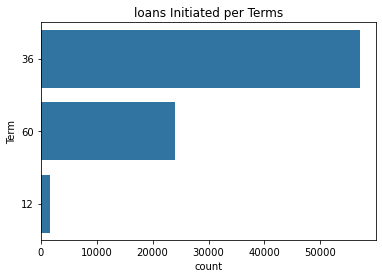

In [42]:
# Plot 'Terms' count on a Horizontal bar chart
terms_count = loans['Term'].value_counts()
sb.countplot(data=loans, y='Term', color=base_color, order=terms_count.index);
plt.title('loans Initiated per Terms');

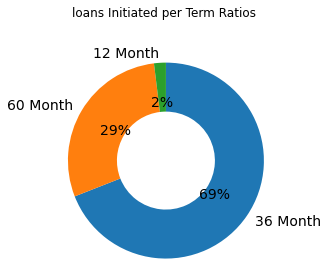

In [41]:
plt.pie(terms_count, labels = ['36 Month','60 Month', '12 Month'], startangle = 90, counterclock = False, autopct='%1.0f%%',wedgeprops = {'width' : 0.5},textprops={'fontsize': 14});
plt.axis('square');
plt.title('loans Initiated per Term Ratios \n \n');

> 69% of loans were for 36 months of duration.

## Who got the loans?

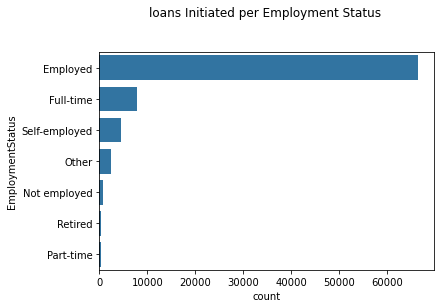

In [45]:
# Plot 'Terms' count on a Horizontal bar chart
emp_count = loans['EmploymentStatus'].value_counts()
sb.countplot(data=loans, y='EmploymentStatus', color=base_color, order=emp_count.index);
plt.title('loans Initiated per Employment Status \n \n');

> Majority of loans were given to 'Employed' borrowers, 'Part-time' borrowers has the lowest loans.

### What is the distribuation of Return, Yield and Loss

In [46]:
# loans by year
yearly=loans.Created.value_counts()
yearly/loans.shape[0]*100

2013    41.115358
2012    23.646017
2011    13.838562
2014    12.077599
2010     6.688276
2009     2.634189
Name: Created, dtype: float64

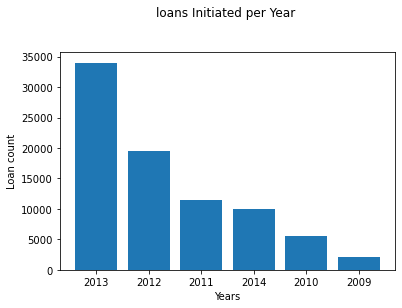

In [48]:
plt.bar(yearly.index, yearly)
plt.xlabel('Years')
plt.ylabel('Loan count')
plt.title('loans Initiated per Year \n \n');

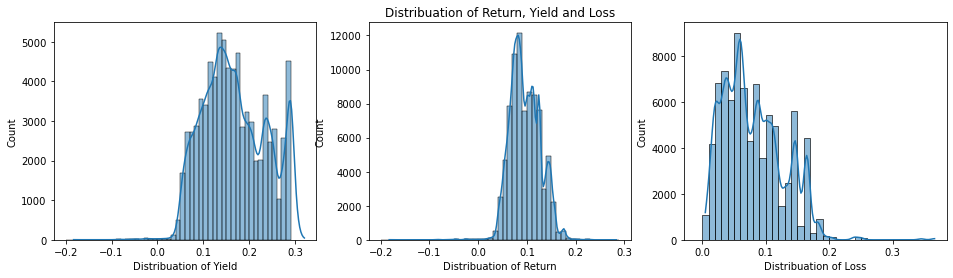

In [56]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
sb.histplot(loans['Yield'], bins = np.arange(-.2,.3,.01), kde = True);
plt.xlabel('Distribuation of Yield')

plt.subplot(1, 3, 2)
plt.title('Distribuation of Return, Yield and Loss')
sb.histplot(loans['Return'], bins = np.arange(-.2,.3,.01), kde = True);
plt.xlabel('Distribuation of Return')

plt.subplot(1, 3, 3)
sb.histplot(loans['Loss'], bins = np.arange(-0.01,.3,.01), kde = True);
plt.xlabel('Distribuation of Loss');

> The distribution of Yield and loss is right skewed, The 3 variables is Muli mode and has outliers.

In [54]:
loans_2013=loans[loans.Created=='2013'].copy()

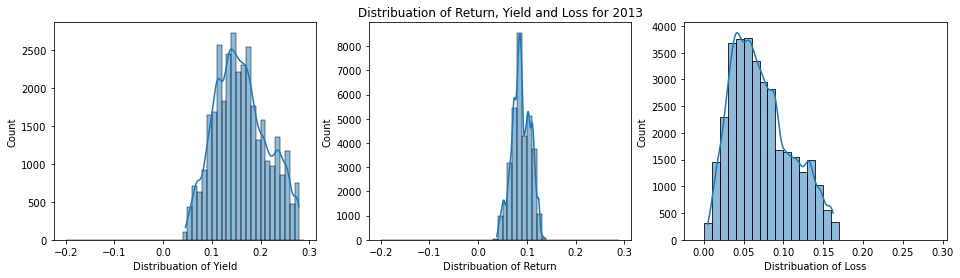

In [57]:
#plot for year 2013
plt.figure(figsize = [16, 4])
plt.subplot(1, 3, 1)
sb.histplot(loans_2013['Yield'], bins = np.arange(-.2,.3,.01), kde = True);
plt.xlabel('Distribuation of Yield')

plt.subplot(1, 3, 2)
plt.title('Distribuation of Return, Yield and Loss for 2013')
sb.histplot(loans_2013['Return'], bins = np.arange(-.2,.3,.01), kde = True);
plt.xlabel('Distribuation of Return')

plt.subplot(1, 3, 3)
sb.histplot(loans_2013['Loss'], bins = np.arange(-0.01,.3,.01), kde = True);
plt.xlabel('Distribuation of Loss');

> The distribution of variables in 2013 is similar to the distribuation of all years with no outliers.

## Bivariate Analysis

### Term vs Return Distributions.

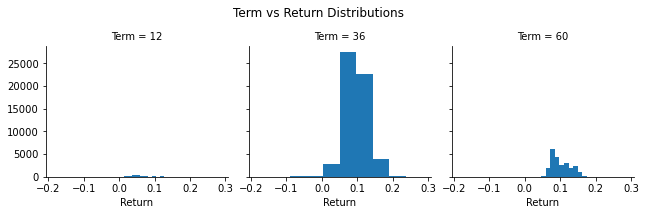

In [67]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loans, col = 'Term');
g.map(plt.hist, "Return");
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle('Term vs Return Distributions \n \n');


### Term vs Past Due Distributions.

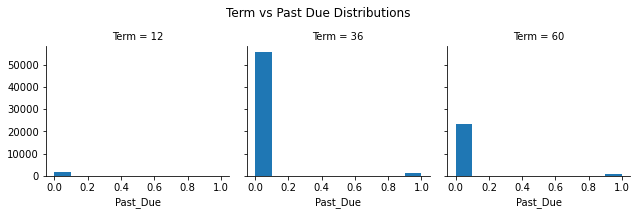

In [68]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loans, col = 'Term')
g.map(plt.hist, "Past_Due")
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle('Term vs Past Due Distributions \n \n');

### Past Due loans per Term 

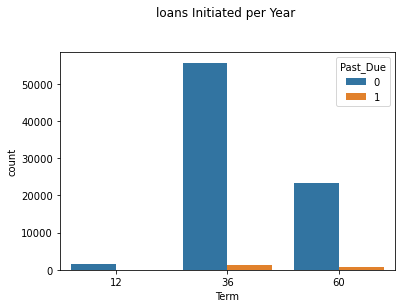

In [70]:
# Clustered Bar Charts
sb.countplot(data = loans, x = 'Term', hue = 'Past_Due');
plt.title('Past Due loans per Term \n \n');

> 60 months loans not perform any better than 36 month. loan duaration doesn't affect payment however we can't ignor that the 36 months term is the most frequent in data.

### Loss by Year

In [71]:
yearly_loss=loans.groupby('Created').mean()['Loss'].reset_index()
yearly_loss.sort_values(by='Loss',ascending=False, inplace=True)
yearly_loss

,Created,Loss
2,2011,0.097369
1,2010,0.093079
3,2012,0.091195
0,2009,0.075917
4,2013,0.072422
5,2014,0.061342


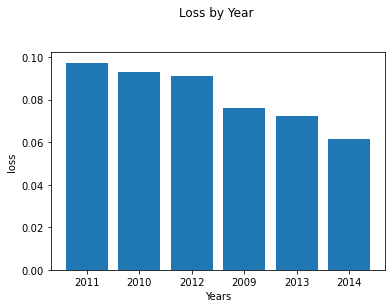

In [73]:
plt.bar(yearly_loss.Created,yearly_loss.Loss);
plt.title('Loss by Year \n \n');
plt.xlabel('Years');
plt.ylabel('loss');

> 2011 has the highest mean "Loss" while 2014 has the lowest.

###  Who is not paying loans?
#### Past Due by Employement

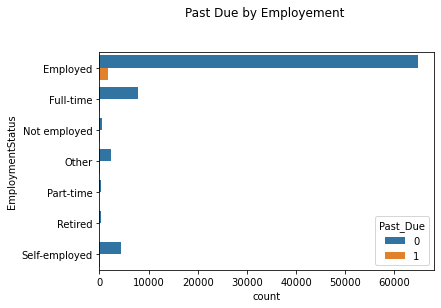

In [74]:
sb.countplot(data = loans, y = 'EmploymentStatus', hue = 'Past_Due');
plt.title('Past Due by Employement \n \n');

### What is the correlation between Loss & Amount ?

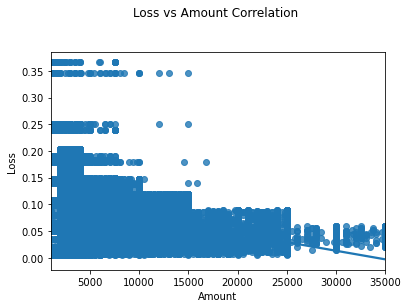

In [75]:
sb.regplot(data = loans, x = 'Amount', y = 'Loss');
plt.ylabel('Loss');
plt.xlabel('Amount');
plt.title('Loss vs Amount Correlation \n \n');

> Amount and Loss  has a negative correlation. loans with a high amount  has a low estimate loss.

### What is the correlation between Borrower Rate & Return?

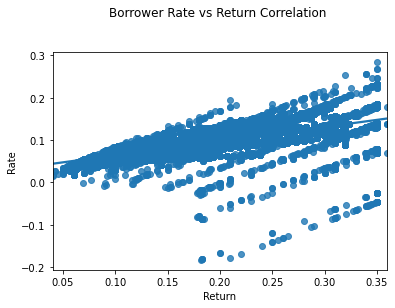

In [76]:
sb.regplot(data = loans, x = 'BorrowerRate', y = 'Return');
plt.ylabel('Rate');
plt.xlabel('Return');
plt.title('Borrower Rate vs Return Correlation \n \n');

> Borrower Rate and return  has a positive correlation. loans with a high interest rate has a high estimate return.

### What is the correlation between Borrower Rate & Loss?

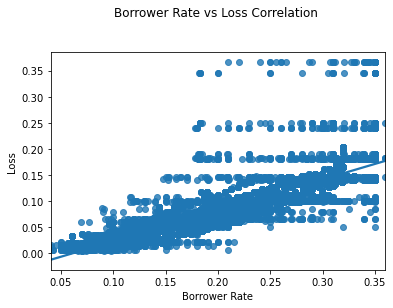

In [77]:
sb.regplot(data = loans, x = 'BorrowerRate', y = 'Loss');
plt.xlabel('Borrower Rate');
plt.ylabel('Loss');
plt.title('Borrower Rate vs Loss Correlation \n \n');

> Borrower Rate and loss  has a positive correlation. loans with a high interest rate has a high estimate loss.


### Loss by Employment Status 5 Number Summary

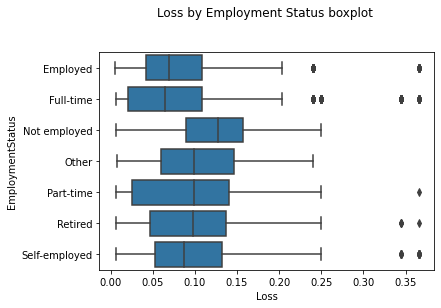

In [78]:
base_color = sb.color_palette()[0]
sb.boxplot(data = loans, x = 'Loss' , y='EmploymentStatus', color=base_color);
plt.title('Loss by Employment Status boxplot \n \n');

> The mean Loss of not employed borrowers is higher than the rest employment status however there was outlier data point in other status.

### Loss by Income range 5 Number Summary

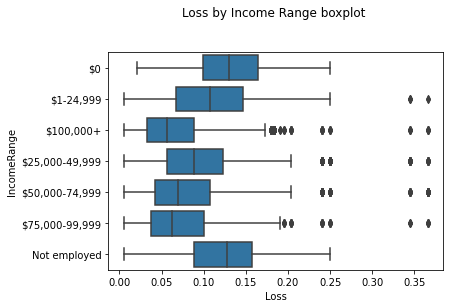

In [79]:
base_color = sb.color_palette()[0]
sb.boxplot(data = loans, x = 'Loss' , y='IncomeRange', color=base_color);
plt.title('Loss by Income Range boxplot \n \n');

> 0 income and unemployed borrowers has more loss than higher income range, the data has outliers

## Multivaiate Analysis
### 'Loss', 'BorrowerRate' and  'IncomeRange' Distributions

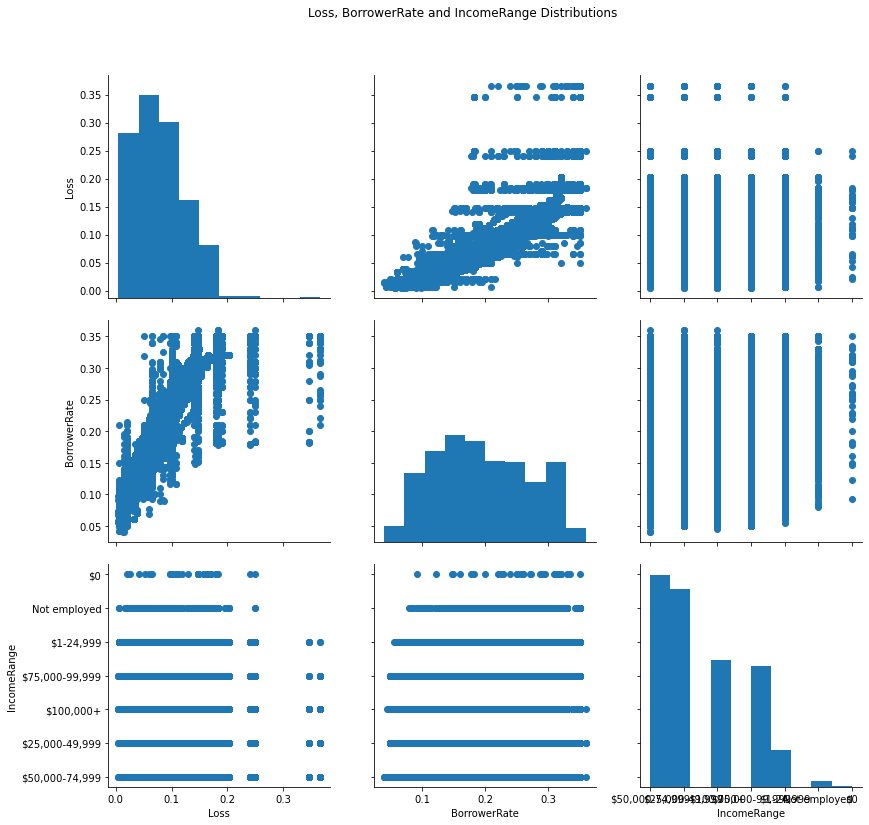

In [89]:
g = sb.PairGrid(data = loans, vars = ['Loss', 'BorrowerRate', 'IncomeRange']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);
g.fig.set_size_inches(12,12);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Loss, BorrowerRate and IncomeRange Distributions ');

<a id='conclusions'></a>
## Conclusions
Using the dataset samples (82682 after cleaning) and during years (2009 : 2013 ) I found the following:
<ul>
<li> 2% of loans are Past-Due</li>    
<li>Most loans were given for 36 months duration.</li>
<li>Most loans were given for employed borrowers.</li>
<li>Highest number of loans (42% of total loans)given was in 2013 and lowest in 2009 (2% of total loans)</li>
<li>100% of past due loans were given to employed borrowers</li>
</ul>


        
